In [1]:
import requests
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

In [2]:
from sqlalchemy import create_engine, inspect

In [3]:
from datetime import timedelta

In [4]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.metrics import roc_curve, auc

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import pipeline, preprocessing

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:

adq=pd.read_csv('./data/acquisitions.csv',encoding = "ISO-8859-1")



In [13]:
adq.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18968 entries, 0 to 18967
Data columns (total 18 columns):
company_permalink         18968 non-null object
company_name              18968 non-null object
company_category_list     13985 non-null object
company_country_code      14300 non-null object
company_state_code        14020 non-null object
company_region            14058 non-null object
company_city              14058 non-null object
acquirer_permalink        18968 non-null object
acquirer_name             18968 non-null object
acquirer_category_list    16580 non-null object
acquirer_country_code     17798 non-null object
acquirer_state_code       17533 non-null object
acquirer_region           17609 non-null object
acquirer_city             17609 non-null object
acquired_at               18956 non-null object
acquired_month            18954 non-null object
price_amount              5012 non-null float64
price_currency_code       18962 non-null object
dtypes: float64(1), object(

In [14]:

comp=pd.read_csv('./data/companies.csv',encoding = "ISO-8859-1")

In [15]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
permalink            66368 non-null object
name                 66367 non-null object
homepage_url         61310 non-null object
category_list        63220 non-null object
funding_total_usd    66368 non-null object
status               66368 non-null object
country_code         59410 non-null object
state_code           57821 non-null object
region               58338 non-null object
city                 58340 non-null object
funding_rounds       66368 non-null int64
founded_at           51147 non-null object
first_funding_at     66344 non-null object
last_funding_at      66368 non-null object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [152]:
len(comp[comp['status']=='acquired'])/len(comp)

0.083613350410608

In [153]:
len(comp[comp['status']=='ipo'])/len(comp)

0.023310479921645446

In [16]:
comp2=comp


In [17]:
ind=comp2[comp2['founded_at']=='1015-01-30'].index

In [18]:
comp2['founded_at'].iloc[ind]='2015-01-30'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
ind=comp2[comp2['founded_at']=='1636-09-08'].index

In [20]:
comp2=comp2.drop(index=ind)

In [21]:
ind=comp2[comp2['founded_at']=='2914-01-01'].index
comp2['founded_at'].iloc[ind]='2014-01-01'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
ind=comp2[comp2['founded_at']=='2914-01-01'].index
comp2=comp2.drop(index=ind)

In [23]:
ind=comp2[comp2['founded_at']=='1592-01-01'].index
comp2=comp2.drop(index=ind)

In [24]:
comp2['founded_at']=pd.to_datetime(comp2['founded_at'])

In [25]:
comp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66365 entries, 0 to 66367
Data columns (total 14 columns):
permalink            66365 non-null object
name                 66364 non-null object
homepage_url         61307 non-null object
category_list        63217 non-null object
funding_total_usd    66365 non-null object
status               66365 non-null object
country_code         59409 non-null object
state_code           57820 non-null object
region               58337 non-null object
city                 58339 non-null object
funding_rounds       66365 non-null int64
founded_at           51144 non-null datetime64[ns]
first_funding_at     66341 non-null object
last_funding_at      66365 non-null object
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 7.6+ MB


In [26]:
ind=comp2[comp2['founded_at']>'2015-12-04 00:00:00'].index
comp2=comp2.drop(index=ind)

In [27]:
# the data was extracted from the December 4, 2015
comp2['founded_at'].max()

Timestamp('2015-12-01 00:00:00')

In [28]:
ind=comp[comp['founded_at']=='1015-01-30'].index
comp['founded_at'].iloc[ind]='2015-01-30'
ind=comp[comp['founded_at']=='1636-09-08'].index
comp=comp.drop(index=ind)
ind=comp[comp['founded_at']=='2914-01-01'].index
comp['founded_at'].iloc[ind]='2014-01-01'
ind=comp[comp['founded_at']=='2914-01-01'].index
comp=comp.drop(index=ind)
ind=comp[comp['founded_at']=='1592-01-01'].index
comp=comp.drop(index=ind)
comp['founded_at']=pd.to_datetime(comp['founded_at'])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
#date for database snapshot
reft='2015-12-04 00:00:00'

In [30]:
reft=pd.Series({'reft':reft})

In [31]:
reft=pd.to_datetime(reft)

In [32]:
reft[0]

Timestamp('2015-12-04 00:00:00')

In [33]:
comp2=comp2.dropna(subset=['status', 'founded_at'])

In [34]:
comp2['days_in_op']=reft[0]-comp2['founded_at']

In [35]:
comp2[['days_in_op','founded_at']][:10]

,days_in_op,founded_at
1,456 days,2014-09-04
3,3259 days,2007-01-01
4,2163 days,2010-01-01
6,6911 days,1997-01-01
7,1798 days,2011-01-01
8,1586 days,2011-08-01
9,1433 days,2012-01-01
11,727 days,2013-12-07
12,10929 days,1986-01-01
13,11660 days,1984-01-01


In [36]:
comp2['days_in_op']=comp2['days_in_op'].astype('timedelta64[D]')

In [37]:
10*365

3650

In [38]:
comp2= comp2[comp2['days_in_op']>3650]

In [39]:
comp2['days_in_op'].describe()

count    11581.000000
mean      7040.438390
std       6170.370248
min       3651.000000
25%       4448.000000
50%       5624.000000
75%       6911.000000
max      97491.000000
Name: days_in_op, dtype: float64

In [40]:
comp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11581 entries, 6 to 66358
Data columns (total 15 columns):
permalink            11581 non-null object
name                 11581 non-null object
homepage_url         10641 non-null object
category_list        11197 non-null object
funding_total_usd    11581 non-null object
status               11581 non-null object
country_code         11121 non-null object
state_code           10982 non-null object
region               10992 non-null object
city                 10993 non-null object
funding_rounds       11581 non-null int64
founded_at           11581 non-null datetime64[ns]
first_funding_at     11581 non-null object
last_funding_at      11581 non-null object
days_in_op           11581 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(12)
memory usage: 1.4+ MB


In [41]:
comp2['first_funding_at']=pd.to_datetime(comp2['first_funding_at'])

In [42]:
comp2['last_funding_at']=pd.to_datetime(comp2['last_funding_at'])

In [43]:
comp2['first_funding_dayinop']=comp2['first_funding_at']-comp2['founded_at']

In [44]:
comp2['last_funding_dayinop']=comp2['last_funding_at']-comp2['founded_at']

In [45]:
comp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11581 entries, 6 to 66358
Data columns (total 17 columns):
permalink                11581 non-null object
name                     11581 non-null object
homepage_url             10641 non-null object
category_list            11197 non-null object
funding_total_usd        11581 non-null object
status                   11581 non-null object
country_code             11121 non-null object
state_code               10982 non-null object
region                   10992 non-null object
city                     10993 non-null object
funding_rounds           11581 non-null int64
founded_at               11581 non-null datetime64[ns]
first_funding_at         11581 non-null datetime64[ns]
last_funding_at          11581 non-null datetime64[ns]
days_in_op               11581 non-null float64
first_funding_dayinop    11581 non-null timedelta64[ns]
last_funding_dayinop     11581 non-null timedelta64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), o

In [46]:
ind=comp2[comp2['first_funding_dayinop'].isnull()].index

In [47]:
comp2

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,days_in_op,first_funding_dayinop,last_funding_dayinop
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,6911.0,4636 days,4737 days
12,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,Health and Wellness,-,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,2010-08-19,2010-08-19,10929.0,8996 days,8996 days
13,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,Health and Wellness,1750000,operating,USA,NJ,Newark,Iselin,1,1984-01-01,2011-03-02,2011-03-02,11660.0,9922 days,9922 days
17,/organization/10-20-media,10-20 Media,http://www.10-20media.com,E-Commerce,2050000,operating,USA,MD,Baltimore,Woodbine,4,2001-01-01,2009-06-18,2011-12-28,5450.0,3090 days,4013 days
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,acquired,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08,5816.0,3719 days,3719 days
57,/organization/123greetings,123Greetings,http://www.123greetings.com/,Internet,5400000,operating,NaN,NaN,NaN,NaN,1,1997-05-01,2015-07-23,2015-07-23,6791.0,6657 days,6657 days
80,/organization/170-systems,170 Systems,http://www.170systems.com,Software,14000000,acquired,USA,MA,Boston,Bedford,1,1990-01-01,2002-04-16,2002-04-16,9468.0,4488 days,4488 days
82,/organization/17u-cn,17u.cn,http://www.17u.cn,Travel,84440319,operating,CHN,4,Shanghai,Suzhou,3,2004-01-01,2008-01-01,2014-02-17,4355.0,1461 days,3700 days
87,/organization/19pay,19pay,http://www.19pay.com.cn,Finance|FinTech,9478511,operating,CHN,22,Beijing,Beijing,3,2005-01-01,2006-01-01,2013-07-01,3989.0,365 days,3103 days
90,/organization/1c-company,1C Company,http://1c.ru/eng,Games|Software|Video Games,200000000,closed,RUS,48,Moscow,Moscow,1,1991-01-01,2011-10-03,2011-10-03,9103.0,7580 days,7580 days


In [48]:
comp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11581 entries, 6 to 66358
Data columns (total 17 columns):
permalink                11581 non-null object
name                     11581 non-null object
homepage_url             10641 non-null object
category_list            11197 non-null object
funding_total_usd        11581 non-null object
status                   11581 non-null object
country_code             11121 non-null object
state_code               10982 non-null object
region                   10992 non-null object
city                     10993 non-null object
funding_rounds           11581 non-null int64
founded_at               11581 non-null datetime64[ns]
first_funding_at         11581 non-null datetime64[ns]
last_funding_at          11581 non-null datetime64[ns]
days_in_op               11581 non-null float64
first_funding_dayinop    11581 non-null timedelta64[ns]
last_funding_dayinop     11581 non-null timedelta64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), o

In [49]:

invs=pd.read_csv('./data/crunchbase-investments.csv',encoding = "ISO-8859-1")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
invs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52870 entries, 0 to 52869
Data columns (total 20 columns):
company_permalink         52869 non-null object
company_name              52869 non-null object
company_category_code     52227 non-null object
company_country_code      52869 non-null object
company_state_code        52378 non-null object
company_region            52869 non-null object
company_city              52337 non-null object
investor_permalink        52868 non-null object
investor_name             52868 non-null object
investor_category_code    2443 non-null object
investor_country_code     40869 non-null object
investor_state_code       36061 non-null object
investor_region           52868 non-null object
investor_city             40390 non-null object
funding_round_type        52867 non-null object
funded_at                 52867 non-null object
funded_month              52867 non-null object
funded_quarter            52867 non-null object
funded_year               52

In [51]:
invs['investor_category_code'].unique()

array([nan, 'finance', 'web', 'nanotech', 'cleantech', 'biotech', 'other',
       'consulting', 'education', 'nonprofit', 'hardware', 'games_video',
       'software', 'advertising', 'security', 'public_relations',
       'semiconductor', 'ecommerce', 'enterprise', 'mobile',
       'network_hosting', 'social', 'news', 'legal', 'medical', 'search',
       'health', 'government', 'pets', 'manufacturing', 'fashion',
       'messaging', 'real_estate', 'transportation'], dtype=object)

In [52]:

rds=pd.read_csv('./data/crunchbase-rounds.csv',encoding = "ISO-8859-1")
    

In [53]:
rds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31679 entries, 0 to 31678
Data columns (total 13 columns):
company_permalink        31679 non-null object
company_name             31679 non-null object
company_category_code    31215 non-null object
company_country_code     31679 non-null object
company_state_code       31334 non-null object
company_region           31679 non-null object
company_city             31329 non-null object
funding_round_type       31679 non-null object
funded_at                31679 non-null object
funded_month             31679 non-null object
funded_quarter           31679 non-null object
funded_year              31679 non-null int64
raised_amount_usd        29100 non-null float64
dtypes: float64(1), int64(1), object(11)
memory usage: 3.1+ MB


In [54]:
rds['funded_at']=pd.to_datetime(rds['funded_at'])

In [55]:
comp.shape

(66365, 14)

In [56]:
invs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52870 entries, 0 to 52869
Data columns (total 20 columns):
company_permalink         52869 non-null object
company_name              52869 non-null object
company_category_code     52227 non-null object
company_country_code      52869 non-null object
company_state_code        52378 non-null object
company_region            52869 non-null object
company_city              52337 non-null object
investor_permalink        52868 non-null object
investor_name             52868 non-null object
investor_category_code    2443 non-null object
investor_country_code     40869 non-null object
investor_state_code       36061 non-null object
investor_region           52868 non-null object
investor_city             40390 non-null object
funding_round_type        52867 non-null object
funded_at                 52867 non-null object
funded_month              52867 non-null object
funded_quarter            52867 non-null object
funded_year               52

In [57]:
invs[:10]

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,NaN,USA,NY,New York,New York,series-a,2012-10-30,2012-10,2012-Q4,2012.0,2000000.0
1,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-23,2012-01,2012-Q1,2012.0,20000.0
2,/company/utap,uTaP,messaging,USA,NaN,United States - Other,NaN,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-01,2012-01,2012-Q1,2012.0,20000.0
3,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-02-15,2012-02,2012-Q1,2012.0,20000.0
4,/company/efuneral,eFuneral,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2011-09-08,2011-09,2011-Q3,2011.0,20000.0
5,/company/tackk,Tackk,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-02-01,2012-02,2012-Q1,2012.0,20000.0
6,/company/acclaimd,Acclaimd,analytics,USA,OH,Columbus,Columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-06-01,2012-06,2012-Q2,2012.0,20000.0
7,/company/acclaimd,Acclaimd,analytics,USA,OH,Columbus,Columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-08-07,2012-08,2012-Q3,2012.0,70000.0
8,/company/toviefor,ToVieFor,ecommerce,USA,NY,New York,New York,/company/2010-nyu-stern-business-plan-competition,2010 NYU Stern Business Plan Competition,NaN,NaN,NaN,unknown,NaN,angel,2010-04-01,2010-04,2010-Q2,2010.0,75000.0
9,/company/ohk-labs,OHK Labs,sports,USA,FL,Palm Beach,Boca Raton,/company/22hundred-group,22Hundred Group,NaN,NaN,NaN,unknown,NaN,angel,2011-09-01,2011-09,2011-Q3,2011.0,100000.0


In [58]:
comp2.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'days_in_op', 'first_funding_dayinop',
       'last_funding_dayinop'],
      dtype='object')

In [59]:
comp2.columns=['permalink', 'company_name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'days_in_op', 'first_funding_dayinop',
       'last_funding_dayinop']

In [60]:
rds.funding_round_type.unique()

array(['series-a', 'angel', 'series-b', 'venture', 'other', 'series-c+',
       'private-equity', 'post-ipo', 'crowdfunding'], dtype=object)

In [61]:
rds[rds['funding_round_type']=='crowdfunding'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1831 to 30536
Data columns (total 13 columns):
company_permalink        30 non-null object
company_name             30 non-null object
company_category_code    29 non-null object
company_country_code     30 non-null object
company_state_code       30 non-null object
company_region           30 non-null object
company_city             29 non-null object
funding_round_type       30 non-null object
funded_at                30 non-null datetime64[ns]
funded_month             30 non-null object
funded_quarter           30 non-null object
funded_year              30 non-null int64
raised_amount_usd        29 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 3.3+ KB


In [62]:
gp=rds[rds['funding_round_type']=='crowdfunding'].groupby('company_name')

In [63]:
crowd=pd.DataFrame({'company_name':list(gp.groups.keys())})

In [64]:
crowd['funded_at']=pd.DataFrame({'funded_at':list(gp['funded_at'].min().values)})


In [65]:
crowd

,company_name,funded_at
0,App.net,2012-08-12
1,Appy Pie,2013-08-28
2,Cloud Imperium Games,2013-09-27
3,Dragon Innovation,2013-08-08
4,Elevation Lab,2012-02-11
5,Exposed Vocals,2013-07-16
6,Faraday Bicycles,2012-08-01
7,Formlabs,2012-10-25
8,Fuel3D,2013-09-04
9,Glowing Plant,2013-06-08


In [66]:
crowd=pd.merge(crowd,rds[rds['funding_round_type']=='crowdfunding'][['company_name','funded_at','raised_amount_usd']],how='left', on=['company_name','funded_at'])

In [67]:
crowd

,company_name,funded_at,raised_amount_usd
0,App.net,2012-08-12,500000.0
1,Appy Pie,2013-08-28,10000.0
2,Cloud Imperium Games,2013-09-27,20000000.0
3,Dragon Innovation,2013-08-08,2145000.0
4,Elevation Lab,2012-02-11,1450000.0
5,Exposed Vocals,2013-07-16,250000.0
6,Faraday Bicycles,2012-08-01,177268.0
7,Formlabs,2012-10-25,2800000.0
8,Fuel3D,2013-09-04,325000.0
9,Glowing Plant,2013-06-08,484000.0


In [68]:
crowd.columns =['company_name', 'cr_funded_at', 'cr_raised_amount_usd']

In [69]:
gp=rds[rds['funding_round_type']=='series-a'].groupby('company_name')
s_a=pd.DataFrame({'company_name':list(gp.groups.keys())})

In [70]:
gp=rds[rds['funding_round_type']=='series-a'].groupby('company_name')
s_a=pd.DataFrame({'company_name':list(gp.groups.keys())})
s_a['funded_at']=pd.DataFrame({'funded_at':list(gp['funded_at'].min().values)})

In [71]:
s_a=pd.merge(s_a,rds[rds['funding_round_type']=='series-a'][['company_name','funded_at','raised_amount_usd']],how='left', on=['company_name','funded_at'])

In [72]:
s_a.columns =['company_name', 'sa_funded_at', 'sa_raised_amount_usd']

In [73]:
s_a=s_a.drop_duplicates()
s_a=s_a.dropna(subset=['sa_funded_at'])

In [74]:
len(s_a['company_name'].drop_duplicates())

5808

In [75]:
df=pd.merge(comp2,s_a,how='left', on='company_name')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11581 entries, 0 to 11580
Data columns (total 19 columns):
permalink                11581 non-null object
company_name             11581 non-null object
homepage_url             10641 non-null object
category_list            11197 non-null object
funding_total_usd        11581 non-null object
status                   11581 non-null object
country_code             11121 non-null object
state_code               10982 non-null object
region                   10992 non-null object
city                     10993 non-null object
funding_rounds           11581 non-null int64
founded_at               11581 non-null datetime64[ns]
first_funding_at         11581 non-null datetime64[ns]
last_funding_at          11581 non-null datetime64[ns]
days_in_op               11581 non-null float64
first_funding_dayinop    11581 non-null timedelta64[ns]
last_funding_dayinop     11581 non-null timedelta64[ns]
sa_funded_at             1410 non-null datetime64[

In [77]:
# df

In [78]:
df['sa_funded_daysop']=df['sa_funded_at']-df['founded_at']

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11581 entries, 0 to 11580
Data columns (total 20 columns):
permalink                11581 non-null object
company_name             11581 non-null object
homepage_url             10641 non-null object
category_list            11197 non-null object
funding_total_usd        11581 non-null object
status                   11581 non-null object
country_code             11121 non-null object
state_code               10982 non-null object
region                   10992 non-null object
city                     10993 non-null object
funding_rounds           11581 non-null int64
founded_at               11581 non-null datetime64[ns]
first_funding_at         11581 non-null datetime64[ns]
last_funding_at          11581 non-null datetime64[ns]
days_in_op               11581 non-null float64
first_funding_dayinop    11581 non-null timedelta64[ns]
last_funding_dayinop     11581 non-null timedelta64[ns]
sa_funded_at             1410 non-null datetime64[

In [80]:
gp=rds[rds['funding_round_type']=='angel'].groupby('company_name')
angel=pd.DataFrame({'company_name':list(gp.groups.keys())})
angel['funded_at']=pd.DataFrame({'funded_at':list(gp['funded_at'].min().values)})
angel=pd.merge(angel,rds[rds['funding_round_type']=='angel'][['company_name','funded_at','raised_amount_usd']],how='left', on=['company_name','funded_at'])

In [81]:
angel.columns =['company_name', 'ag_funded_at', 'ag_raised_amount_usd']

In [82]:
gp=rds[rds['funding_round_type']=='venture'].groupby('company_name')
vent=pd.DataFrame({'company_name':list(gp.groups.keys())})
vent['funded_at']=pd.DataFrame({'funded_at':list(gp['funded_at'].min().values)})
vent=pd.merge(vent,rds[rds['funding_round_type']=='venture'][['company_name','funded_at','raised_amount_usd']],how='left', on=['company_name','funded_at'])

In [83]:
vent.columns=['company_name', 've_funded_at', 've_raised_amount_usd']

In [84]:
df=pd.merge(df,angel,how='left', on='company_name')

In [85]:
df=pd.merge(df,vent,how='left', on='company_name')

In [86]:
df=pd.merge(df,crowd,how='left', on='company_name')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11596 entries, 0 to 11595
Data columns (total 26 columns):
permalink                11596 non-null object
company_name             11596 non-null object
homepage_url             10655 non-null object
category_list            11212 non-null object
funding_total_usd        11596 non-null object
status                   11596 non-null object
country_code             11136 non-null object
state_code               10997 non-null object
region                   11007 non-null object
city                     11008 non-null object
funding_rounds           11596 non-null int64
founded_at               11596 non-null datetime64[ns]
first_funding_at         11596 non-null datetime64[ns]
last_funding_at          11596 non-null datetime64[ns]
days_in_op               11596 non-null float64
first_funding_dayinop    11596 non-null timedelta64[ns]
last_funding_dayinop     11596 non-null timedelta64[ns]
sa_funded_at             1412 non-null datetime64[

In [88]:
df['founded_at']=pd.to_datetime(df['founded_at'])

In [89]:
df['ve_funded_at']=pd.to_datetime(df['ve_funded_at'])

In [90]:
df['sa_funded_at']=pd.to_datetime(df['sa_funded_at'])

In [91]:
df['cr_funded_at']=pd.to_datetime(df['cr_funded_at'])# to be run

In [92]:
df['first_funding_at']=pd.to_datetime(df['first_funding_at'])

In [93]:
df['cr_funded_daysop']=df['cr_funded_at']-df['founded_at'] # to be run

In [94]:
df['cr_funded_daysop']=df['cr_funded_daysop'].astype('timedelta64[D]')

In [95]:
df['sa_funded_daysop']=df['sa_funded_at']-df['founded_at']

In [96]:
df['ag_funded_daysop']=df['ag_funded_at']-df['founded_at']

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11596 entries, 0 to 11595
Data columns (total 28 columns):
permalink                11596 non-null object
company_name             11596 non-null object
homepage_url             10655 non-null object
category_list            11212 non-null object
funding_total_usd        11596 non-null object
status                   11596 non-null object
country_code             11136 non-null object
state_code               10997 non-null object
region                   11007 non-null object
city                     11008 non-null object
funding_rounds           11596 non-null int64
founded_at               11596 non-null datetime64[ns]
first_funding_at         11596 non-null datetime64[ns]
last_funding_at          11596 non-null datetime64[ns]
days_in_op               11596 non-null float64
first_funding_dayinop    11596 non-null timedelta64[ns]
last_funding_dayinop     11596 non-null timedelta64[ns]
sa_funded_at             1412 non-null datetime64[

In [98]:
df['ve_funded_daysop']=df['ve_funded_at']-df['founded_at']

In [99]:
df['first_funding_dayinop']=df['first_funding_at']-df['founded_at']

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11596 entries, 0 to 11595
Data columns (total 29 columns):
permalink                11596 non-null object
company_name             11596 non-null object
homepage_url             10655 non-null object
category_list            11212 non-null object
funding_total_usd        11596 non-null object
status                   11596 non-null object
country_code             11136 non-null object
state_code               10997 non-null object
region                   11007 non-null object
city                     11008 non-null object
funding_rounds           11596 non-null int64
founded_at               11596 non-null datetime64[ns]
first_funding_at         11596 non-null datetime64[ns]
last_funding_at          11596 non-null datetime64[ns]
days_in_op               11596 non-null float64
first_funding_dayinop    11596 non-null timedelta64[ns]
last_funding_dayinop     11596 non-null timedelta64[ns]
sa_funded_at             1412 non-null datetime64[

In [101]:
df['ag_funded_daysop']=df['ag_funded_daysop'].astype('timedelta64[D]')

In [102]:
df['ve_funded_daysop']=df['ve_funded_daysop'].astype('timedelta64[D]')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11596 entries, 0 to 11595
Data columns (total 29 columns):
permalink                11596 non-null object
company_name             11596 non-null object
homepage_url             10655 non-null object
category_list            11212 non-null object
funding_total_usd        11596 non-null object
status                   11596 non-null object
country_code             11136 non-null object
state_code               10997 non-null object
region                   11007 non-null object
city                     11008 non-null object
funding_rounds           11596 non-null int64
founded_at               11596 non-null datetime64[ns]
first_funding_at         11596 non-null datetime64[ns]
last_funding_at          11596 non-null datetime64[ns]
days_in_op               11596 non-null float64
first_funding_dayinop    11596 non-null timedelta64[ns]
last_funding_dayinop     11596 non-null timedelta64[ns]
sa_funded_at             1412 non-null datetime64[

In [104]:
df['state_code'].value_counts()[:5]

CA    2584
MA     693
NY     532
TX     469
WA     271
Name: state_code, dtype: int64

In [105]:
ind=df[df['state_code']=='CA'].index
df['CA']=0
df['CA'].iloc[ind]=1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [106]:
ind=df[df['state_code']=='NY'].index
df['NY']=0
df['NY'].iloc[ind]=1

ind=df[df['state_code']=='MA'].index
df['MA']=0
df['MA'].iloc[ind]=1

ind=df[df['state_code']=='TX'].index
df['TX']=0
df['TX'].iloc[ind]=1

ind=df[df['state_code']=='WA'].index
df['WA']=0
df['WA'].iloc[ind]=1


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [107]:
df['country_code'].value_counts()[:5]

USA    7930
GBR     617
CAN     393
CHN     333
FRA     243
Name: country_code, dtype: int64

In [108]:
ind=df[df['country_code']=='USA'].index
df['USA']=0
df['USA'].iloc[ind]=1

ind=df[df['country_code']=='GRB'].index
df['GBR']=0
df['GBR'].iloc[ind]=1

ind=df[df['country_code']=='CAN'].index
df['CAN']=0
df['CAN'].iloc[ind]=1

ind=df[df['country_code']=='CHN'].index
df['CHN']=0
df['CHN'].iloc[ind]=1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [109]:
df['founded_year'] = df['founded_at'].dt.year
df['founded_month'] = df['founded_at'].dt.month

In [110]:
df=df.dropna(subset=['category_list', 'status','first_funding_dayinop', 'founded_at'])

In [111]:
df['sa_funded_daysop']=df['sa_funded_daysop'].astype('timedelta64[D]')

In [112]:
df['first_funding_dayinop']=df['first_funding_dayinop'].astype('timedelta64[D]')

In [113]:
inf=pd.read_csv('./data/inflation.csv')

In [114]:
df['founded_year']=df['founded_year'].astype(int)

In [115]:
inf['founded_year']=inf['YEAR']

In [116]:
df=pd.merge(df,inf[['founded_year', 'AVE']],how='left', on='founded_year')# AVE is the annual average inflation


In [117]:
cpi=pd.read_csv('./data/cpi.csv')

In [118]:
cpi['founded_year']=cpi['YEAR']

In [119]:
cpi[['founded_year','adj_base2018']].head()

,founded_year,adj_base2018
0,2018.0,1.00
1,2017.0,0.97
2,2016.0,0.95
3,2015.0,0.94
4,2014.0,0.94


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11212 entries, 0 to 11211
Data columns (total 41 columns):
permalink                11212 non-null object
company_name             11212 non-null object
homepage_url             10380 non-null object
category_list            11212 non-null object
funding_total_usd        11212 non-null object
status                   11212 non-null object
country_code             10822 non-null object
state_code               10690 non-null object
region                   10696 non-null object
city                     10697 non-null object
funding_rounds           11212 non-null int64
founded_at               11212 non-null datetime64[ns]
first_funding_at         11212 non-null datetime64[ns]
last_funding_at          11212 non-null datetime64[ns]
days_in_op               11212 non-null float64
first_funding_dayinop    11212 non-null float64
last_funding_dayinop     11212 non-null timedelta64[ns]
sa_funded_at             1411 non-null datetime64[ns]
sa_r

In [121]:
df.columns

Index(['permalink', 'company_name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'days_in_op', 'first_funding_dayinop',
       'last_funding_dayinop', 'sa_funded_at', 'sa_raised_amount_usd',
       'sa_funded_daysop', 'ag_funded_at', 'ag_raised_amount_usd',
       've_funded_at', 've_raised_amount_usd', 'cr_funded_at',
       'cr_raised_amount_usd', 'cr_funded_daysop', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA', 'USA', 'GBR', 'CAN',
       'CHN', 'founded_year', 'founded_month', 'AVE'],
      dtype='object')

In [122]:
df.columns=['permalink', 'company_name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'days_in_op', 'first_funding_dayinop',
       'last_funding_dayinop', 'sa_funded_at', 'sa_raised_amount_usd',
       'sa_funded_daysop', 'ag_funded_at', 'ag_raised_amount_usd',
       've_funded_at', 've_raised_amount_usd', 'cr_funded_at',
       'cr_raised_amount_usd', 'cr_funded_daysop', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA', 'USA', 'GBR', 'CAN',
       'CHN', 'founded_year', 'founded_month', 'ave_inf_y']

In [123]:
df=pd.merge(df,cpi[['founded_year','adj_base2018']],how='left', on='founded_year')# CPIt/CPI_2018, CPI consumer price index

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11212 entries, 0 to 11211
Data columns (total 42 columns):
permalink                11212 non-null object
company_name             11212 non-null object
homepage_url             10380 non-null object
category_list            11212 non-null object
funding_total_usd        11212 non-null object
status                   11212 non-null object
country_code             10822 non-null object
state_code               10690 non-null object
region                   10696 non-null object
city                     10697 non-null object
funding_rounds           11212 non-null int64
founded_at               11212 non-null datetime64[ns]
first_funding_at         11212 non-null datetime64[ns]
last_funding_at          11212 non-null datetime64[ns]
days_in_op               11212 non-null float64
first_funding_dayinop    11212 non-null float64
last_funding_dayinop     11212 non-null timedelta64[ns]
sa_funded_at             1411 non-null datetime64[ns]
sa_r

In [125]:
df['sa_raised_amount_usd_adj']=df['sa_raised_amount_usd']*df['adj_base2018']

In [126]:
df['ag_raised_amount_usd_adj']=df['ag_raised_amount_usd']*df['adj_base2018']

In [127]:
df['ve_raised_amount_usd_adj']=df['ve_raised_amount_usd']*df['adj_base2018']

In [128]:
df['cr_raised_amount_usd_adj']=df['cr_raised_amount_usd']*df['adj_base2018']

In [129]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11212 entries, 0 to 11211
Data columns (total 46 columns):
permalink                   11212 non-null object
company_name                11212 non-null object
homepage_url                10380 non-null object
category_list               11212 non-null object
funding_total_usd           11212 non-null object
status                      11212 non-null object
country_code                10822 non-null object
state_code                  10690 non-null object
region                      10696 non-null object
city                        10697 non-null object
funding_rounds              11212 non-null int64
founded_at                  11212 non-null datetime64[ns]
first_funding_at            11212 non-null datetime64[ns]
last_funding_at             11212 non-null datetime64[ns]
days_in_op                  11212 non-null float64
first_funding_dayinop       11212 non-null float64
last_funding_dayinop        11212 non-null timedelta64[ns]
sa_fund

In [130]:
df=df.dropna(subset=['category_list', 'status','first_funding_dayinop', 'founded_at'])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11212 entries, 0 to 11211
Data columns (total 46 columns):
permalink                   11212 non-null object
company_name                11212 non-null object
homepage_url                10380 non-null object
category_list               11212 non-null object
funding_total_usd           11212 non-null object
status                      11212 non-null object
country_code                10822 non-null object
state_code                  10690 non-null object
region                      10696 non-null object
city                        10697 non-null object
funding_rounds              11212 non-null int64
founded_at                  11212 non-null datetime64[ns]
first_funding_at            11212 non-null datetime64[ns]
last_funding_at             11212 non-null datetime64[ns]
days_in_op                  11212 non-null float64
first_funding_dayinop       11212 non-null float64
last_funding_dayinop        11212 non-null timedelta64[ns]
sa_fund

In [132]:
invs['investor_category_code'].unique()

array([nan, 'finance', 'web', 'nanotech', 'cleantech', 'biotech', 'other',
       'consulting', 'education', 'nonprofit', 'hardware', 'games_video',
       'software', 'advertising', 'security', 'public_relations',
       'semiconductor', 'ecommerce', 'enterprise', 'mobile',
       'network_hosting', 'social', 'news', 'legal', 'medical', 'search',
       'health', 'government', 'pets', 'manufacturing', 'fashion',
       'messaging', 'real_estate', 'transportation'], dtype=object)

In [133]:
ind=df[df['category_list'].str.contains('Biotech', case=False, na=False)].index
df['Biotech']=0
df['Biotech'].iloc[ind]=1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [134]:
ind=df[df['category_list'].str.contains('web', case=False, na=False)].index
df['web']=0
df['web'].iloc[ind]=1
ind=df[df['category_list'].str.contains('nanotech', case=False, na=False)].index
df['nanotech']=0
df['nanotech'].iloc[ind]=1
ind=df[df['category_list'].str.contains('cleantech', case=False, na=False)].index
df['cleantech']=0
df['cleantech'].iloc[ind]=1
ind=df[df['category_list'].str.contains('consulting', case=False, na=False)].index
df['consulting']=0
df['consulting'].iloc[ind]=1
ind=df[df['category_list'].str.contains('education', case=False, na=False)].index
df['education']=0
df['education'].iloc[ind]=1
ind=df[df['category_list'].str.contains('hardware', case=False, na=False)].index
df['hardware']=0
df['hardware'].iloc[ind]=1
ind=df[df['category_list'].str.contains('games_video', case=False, na=False)].index
df['games_video']=0
df['games_video'].iloc[ind]=1
ind=df[df['category_list'].str.contains('software', case=False, na=False)].index
df['software']=0
df['software'].iloc[ind]=1
ind=df[df['category_list'].str.contains('advertising', case=False, na=False)].index
df['advertising']=0
df['advertising'].iloc[ind]=1
ind=df[df['category_list'].str.contains('security', case=False, na=False)].index
df['security']=0
df['security'].iloc[ind]=1
ind=df[df['category_list'].str.contains('public_relations', case=False, na=False)].index
df['public_relations']=0
df['public_relations'].iloc[ind]=1
ind=df[df['category_list'].str.contains( 'semiconductor', case=False, na=False)].index
df['semiconductor']=0
df['semiconductor'].iloc[ind]=1
ind=df[df['category_list'].str.contains( 'ecommerce', case=False, na=False)].index
df['ecommerce']=0
df['ecommerce'].iloc[ind]=1
ind=df[df['category_list'].str.contains('enterprise', case=False, na=False)].index
df['enterprise']=0
df['enterprise'].iloc[ind]=1
ind=df[df['category_list'].str.contains( 'mobile', case=False, na=False)].index
df['mobile']=0
df['mobile'].iloc[ind]=1
ind=df[df['category_list'].str.contains( 'network_hosting', case=False, na=False)].index
df['network_hosting']=0
df['network_hosting'].iloc[ind]=1
ind=df[df['category_list'].str.contains('social', case=False, na=False)].index
df['social']=0
df['social'].iloc[ind]=1
ind=df[df['category_list'].str.contains( 'news', case=False, na=False)].index
df['news']=0
df['news'].iloc[ind]=1
ind=df[df['category_list'].str.contains( 'legal', case=False, na=False)].index
df['legal']=0
df['legal'].iloc[ind]=1
ind=df[df['category_list'].str.contains('medical', case=False, na=False)].index
df['medical']=0
df['medical'].iloc[ind]=1
ind=df[df['category_list'].str.contains('search', case=False, na=False)].index
df['search']=0
df['search'].iloc[ind]=1
ind=df[df['category_list'].str.contains( 'health', case=False, na=False)].index
df['health']=0
df['health'].iloc[ind]=1
ind=df[df['category_list'].str.contains('government', case=False, na=False)].index
df['government']=0
df['government'].iloc[ind]=1
ind=df[df['category_list'].str.contains( 'pets', case=False, na=False)].index
df['pets']=0
df['pets'].iloc[ind]=1
ind=df[df['category_list'].str.contains( 'manufacturing', case=False, na=False)].index
df['manufacturing']=0
df['manufacturing'].iloc[ind]=1
ind=df[df['category_list'].str.contains( 'fashion', case=False, na=False)].index
df['fashion']=0
df['fashion'].iloc[ind]=1
ind=df[df['category_list'].str.contains('messaging', case=False, na=False)].index
df['messaging']=0
df['messaging'].iloc[ind]=1
ind=df[df['category_list'].str.contains('real_estate', case=False, na=False)].index
df['real_estate']=0
df['real_estate'].iloc[ind]=1
ind=df[df['category_list'].str.contains('transportation', case=False, na=False)].index
df['transportation']=0
df['transportation'].iloc[ind]=1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [135]:
ind=df[df['category_list'].str.contains('finance', case=False, na=False)].index
df['finance']=0
df['finance'].iloc[ind]=1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [136]:
df.columns

Index(['permalink', 'company_name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'days_in_op', 'first_funding_dayinop',
       'last_funding_dayinop', 'sa_funded_at', 'sa_raised_amount_usd',
       'sa_funded_daysop', 'ag_funded_at', 'ag_raised_amount_usd',
       've_funded_at', 've_raised_amount_usd', 'cr_funded_at',
       'cr_raised_amount_usd', 'cr_funded_daysop', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA', 'USA', 'GBR', 'CAN',
       'CHN', 'founded_year', 'founded_month', 'ave_inf_y', 'adj_base2018',
       'sa_raised_amount_usd_adj', 'ag_raised_amount_usd_adj',
       've_raised_amount_usd_adj', 'cr_raised_amount_usd_adj', 'Biotech',
       'web', 'nanotech', 'cleantech', 'consulting', 'education', 'hardware',
       'games_video', 'software', 'advertising', 'security',
       'public_rela

In [146]:
df[['web', 'Biotech', 'nanotech', 'cleantech', 'consulting', 'education',
       'hardware', 'games_video', 'software', 'advertising', 'security',
       'public_relations', 'semiconductor', 'ecommerce', 'enterprise',
       'mobile', 'network_hosting', 'social', 'news', 'legal', 'medical',
       'search', 'health', 'government', 'pets', 'manufacturing', 'fashion',
       'messaging', 'real_estate', 'transportation']].sum().sort_values(ascending=False)[:20].index

Index(['software', 'Biotech', 'health', 'web', 'mobile', 'enterprise',
       'hardware', 'security', 'manufacturing', 'advertising', 'semiconductor',
       'medical', 'social', 'education', 'consulting', 'search', 'messaging',
       'news', 'transportation', 'fashion'],
      dtype='object')

In [138]:
df_model=df[['company_name', 'status', 'country_code', 'state_code', 'days_in_op', 'first_funding_dayinop',
       'sa_funded_daysop', 'cr_funded_daysop', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA','founded_month', 'ave_inf_y',
       'sa_raised_amount_usd_adj', 'ag_raised_amount_usd_adj',
       've_raised_amount_usd_adj', 'cr_raised_amount_usd_adj', 
        'software', 'Biotech', 'health', 'web', 'mobile', 'enterprise',
       'hardware', 'advertising', 'security', 'manufacturing', 'social',
       'semiconductor', 'medical', 'consulting', 'education', 'search',
       'messaging', 'news', 'transportation', 'fashion']]

In [148]:
df_model=df[['company_name', 'status', 'country_code', 'state_code', 'days_in_op', 'first_funding_dayinop',
       'sa_funded_daysop', 'cr_funded_daysop', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA','founded_month', 'ave_inf_y',
       'sa_raised_amount_usd_adj', 'ag_raised_amount_usd_adj',
       've_raised_amount_usd_adj', 'cr_raised_amount_usd_adj', 
        'software', 'Biotech', 'health', 'web', 'mobile', 'enterprise',
       'hardware', 'security', 'manufacturing', 'advertising', 'semiconductor',
       'medical', 'social', 'education', 'consulting', 'search', 'messaging',
       'news', 'transportation', 'fashion']]

In [139]:
df_model=df_model[df_model['country_code']=='USA'].drop_duplicates()

In [140]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7700 entries, 1 to 11210
Data columns (total 41 columns):
company_name                7700 non-null object
status                      7700 non-null object
country_code                7700 non-null object
state_code                  7697 non-null object
days_in_op                  7700 non-null float64
first_funding_dayinop       7700 non-null float64
sa_funded_daysop            1376 non-null float64
cr_funded_daysop            3 non-null float64
ag_funded_daysop            453 non-null float64
ve_funded_daysop            2089 non-null float64
CA                          7700 non-null int64
NY                          7700 non-null int64
MA                          7700 non-null int64
TX                          7700 non-null int64
WA                          7700 non-null int64
founded_month               7700 non-null int64
ave_inf_y                   7607 non-null float64
sa_raised_amount_usd_adj    1285 non-null float64
ag_raised_am

In [141]:
df_model=df_model.fillna(0)

In [149]:
ind=df[df_model['first_funding_dayinop']>10*365].index
df_model['first_funding_dayinop'].iloc[ind]=0

,permalink,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,search,health,government,pets,manufacturing,fashion,messaging,real_estate,transportation,finance
0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,...,0,0,0,0,0,0,0,0,0,0
1,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,Health and Wellness,-,operating,USA,CA,Los Angeles,Los Angeles,...,0,1,0,0,0,0,0,0,0,0
2,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,Health and Wellness,1750000,operating,USA,NJ,Newark,Iselin,...,0,1,0,0,0,0,0,0,0,0
4,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,acquired,USA,NY,New York City,New York,...,0,0,0,0,0,0,0,0,0,0
5,/organization/123greetings,123Greetings,http://www.123greetings.com/,Internet,5400000,operating,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,/organization/170-systems,170 Systems,http://www.170systems.com,Software,14000000,acquired,USA,MA,Boston,Bedford,...,0,0,0,0,0,0,0,0,0,0
9,/organization/1c-company,1C Company,http://1c.ru/eng,Games|Software|Video Games,200000000,closed,RUS,48,Moscow,Moscow,...,0,0,0,0,0,0,0,0,0,0
10,/organization/1life-healthcare,1Life Healthcare,http://www.1life.com,Health and Wellness|Health Care|Services,30000000,operating,USA,CA,SF Bay Area,San Francisco,...,0,1,0,0,0,0,0,0,0,0
11,/organization/1stdibs,1stdibs,http://www.1stdibs.com,E-Commerce,117000000,operating,USA,NY,New York City,New York,...,0,0,0,0,0,0,0,0,0,0
13,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,http://2020gene.com,Biotechnology|Health Diagnostics,4345427,operating,USA,MD,"Washington, D.C.",Rockville,...,0,1,0,0,0,0,0,0,0,0


In [142]:
df_model.to_csv('./data/start-up_mod.csv')

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


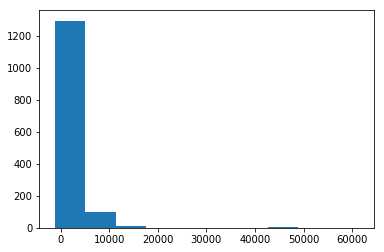

In [143]:
y=df['sa_funded_daysop']
plt.hist(y, range=(y.min(), y.max()));

In [144]:
y.describe()

count     1411.000000
mean      2235.784550
std       3676.290718
min      -1208.000000
25%        585.500000
50%       1380.000000
75%       2906.500000
max      61421.000000
Name: sa_funded_daysop, dtype: float64

In [ ]:
df_model2=df[['company_name', 'status', 'first_funding_dayinop', 'cr_funded_daysop', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA','founded_month', 'ave_inf_y', 'ag_raised_amount_usd_adj',
       've_raised_amount_usd_adj', 'cr_raised_amount_usd_adj', 
        'software', 'Biotech', 'health', 'web', 'mobile', 'enterprise',
       'hardware', 'advertising', 'security', 'manufacturing', 'social',
       'semiconductor', 'medical', 'consulting', 'education', 'search',
       'messaging', 'news', 'transportation', 'fashion']]

In [ ]:
df_model2=df_model2.fillna(0)

In [ ]:
df_model2=df_model2[df_model2['sa_funded_daysop']>=0]


In [ ]:
# removing funding that occured hafter 10 years of operation
df_model2=df_model2.reset_index()

In [ ]:
ind=df_model2[df_model2['sa_funded_daysop']>(9*365)].index

In [ ]:
df_model2['sa_funded_daysop'].iloc[ind]=0
df_model2['sa_raised_amount_usd_adj'].iloc[ind]=0

In [ ]:
df_model2.info()

In [ ]:
y=df_model2['sa_funded_daysop']
plt.hist(y, range=(y.min(), y.max()));

In [ ]:
y.max()

In [ ]:

df_model2.to_csv('./data/start-up_mod_w_sa.csv')

In [ ]:
!ls /Users/carolina/start-up-classification/data

In [ ]:
df.columns

In [ ]:
df2=df[['company_name','founded_at','country_code','status', 'CA', 'NY','MA', 'TX', 'WA', 'founded_month', 'first_funding_dayinop',
        'ave_inf_y', 'ag_funded_daysop', 'ag_raised_amount_usd_adj','web', 'Biotech', 'nanotech', 'cleantech', 'consulting', 'education',
       'hardware', 'games_video', 'software', 'advertising', 'security',
       'public_relations', 'semiconductor', 'ecommerce', 'enterprise',
       'mobile', 'network_hosting', 'social', 'news', 'legal', 'medical',
       'search', 'health', 'government', 'pets', 'manufacturing', 'fashion',
       'messaging', 'real_estate', 'transportation']]

In [ ]:
df2=df2[df2['country_code']=='USA']

In [ ]:
adq.info()

In [ ]:
ind=adq[adq['acquired_at']=='3201-10-21'].index
adq=adq.drop(index=ind)

In [ ]:
ind=adq[adq['acquired_at']=='1201-11-03 00:00:00'].index
adq=adq.drop(index=ind)

In [ ]:
adq['acquired_at']=pd.to_datetime(adq['acquired_at'])

In [ ]:
df2=df2.drop_duplicates()

In [ ]:
df2=pd.merge(df2,adq[['company_name','acquired_at']],how='left',on='company_name')

In [ ]:
df2['adq_daysonop']=df2['acquired_at']-df2['founded_at']

In [ ]:
df2.info()

In [ ]:
y=df2[df2['status']=='acquired']['adq_daysonop']/timedelta(days=1)

In [ ]:
y.describe()

In [ ]:

plt.hist(y, range=(y.min(), y.max()));

In [ ]:
5026.000000/365

In [ ]:
y=df2[df2['status']=='acquired']['adq_daysonop']/timedelta(days=1)
x=df2[df2['status']=='acquired']['category_code']

In [ ]:
plt.figure(figsize= [10,10])
plt.scatter(y,x)

In [ ]:
x.describe()

In [ ]:
soft=df2[df2['category_code']=='software']

In [ ]:
# percentace of software companies that are adquired
len(soft[soft['status']=='acquired'])/len(soft)

In [ ]:
#percentage of web companies that are adquired
len(df2[df2['category_code']=='web'][df2['status']=='acquired'])/len(df2[df2['category_code']=='web'])

In [ ]:
test=pd.get_dummies(df2[['category_code']])

In [ ]:
# top 10 categories by number of companies
test.sum().sort_values(ascending=False)[:10]

In [ ]:
# top 10 categories by number of companies acquired
pd.get_dummies(df2[df2['status']=='acquired']['category_code']).sum().sort_values(ascending=False)[:10]

In [ ]:
# top 20 categories by percentage of companies acquired
(pd.get_dummies(df2[df2['status']=='acquired']['category_code']).sum()/pd.get_dummies(df2['category_code']).sum()).sort_values(ascending=False)[:20]

In [ ]:
# top 10 categories by number of companies ipo
pd.get_dummies(df2[df2['status']=='ipo']['category_code']).sum().sort_values(ascending=False)[:10]

In [ ]:
# top 20 categories by percentage of companies ipo
(pd.get_dummies(df2[df2['status']=='ipo']['category_code']).sum()/pd.get_dummies(df2['category_code']).sum()).sort_values(ascending=False)[:20]

In [ ]:
df2[(df2['category_code']=='music') & (df2['status']=='ipo')]

In [ ]:
df2[(df2['category_code']=='biotech') & (df2['status']=='ipo')]

In [ ]:
df2[(df2['category_code']=='software') & (df2['status']=='ipo')]

In [ ]:
df2[(df2['category_code']=='web') & (df2['status']=='ipo')]

In [ ]:
comp.columns=['permalink', 'company_name', 'category_code', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'last_milestone_at',
       'days_in_op']

In [ ]:
df3=pd.merge(comp,adq[['company_name','acquired_at']],how='left',on='company_name')

In [ ]:
df3.info()

In [ ]:
df3['adq_daysonop']=df3['acquired_at']-df3['founded_at']

In [ ]:
df3['adq_daysonop']=df3['adq_daysonop'].astype('timedelta64[D]')

In [ ]:
df3=df3[df3['adq_daysonop']>0]

In [ ]:
df3=df3.dropna(subset=['category_code', 'status','founded_at'])

In [ ]:
len(df3[df3['status']=='acquired'])

In [ ]:
y=df3[df3['status']=='acquired']['adq_daysonop']
x=df3[df3['status']=='acquired']['category_code']

In [ ]:
plt.figure(figsize= [11,11])
plt.hist(y, range=(y.min(), y.max()),edgecolor='black', color='royalblue')
plt.title("Company time in opeartion at acquisition", size = 25)
plt.xlabel('days', size = 20, labelpad = 15)
plt.xticks(size=15)
plt.yticks(size=15)
sns.despine();

In [ ]:
y.describe()

In [ ]:
plt.figure(figsize= [11,11])
plt.scatter(y,x)
plt.title("Time to adquisition by company category", size = 25)
plt.xlabel('Time in operation at acquisition, days', size = 20, labelpad = 15)
plt.ylabel('Category code              ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine();

In [ ]:
3234/365

In [ ]:
len(comp[comp['status']=='acquired'])/len(comp)

In [ ]:
len(comp)

In [ ]:
comp['founded_year'].describe()

In [ ]:
y=comp['founded_year']
plt.figure(figsize= [11,11])
plt.hist(y, range=(y.min(), y.max()),edgecolor='black', color='royalblue')